In [49]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from math import *


In [50]:
def f(a, theta):
    mult = a*sin(theta)
    inte = 3-a-a*sin(theta)+a*cos(theta)/2
    return(mult*inte)

fvec = np.vectorize(f)

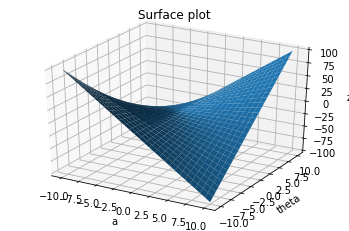

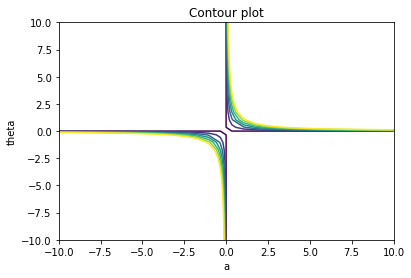

In [133]:
def f(a, theta):
    mult = a*sin(theta)
    inte = 3-a-a*sin(theta)+a*cos(theta)/2
    return(a*theta)

fvec = np.vectorize(f)

# variables
a = np.linspace(-10, 10, 30)
theta = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(a, theta)
Z = fvec(X,Y)

# surface plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('a')
ax.set_ylabel('theta')
ax.set_zlabel('z')
ax.set_title('Surface plot')
plt.show()

# contour plot
levels = np.arange(0,1.4,0.2)
plt.contour(X, Y, Z,levels=levels);
plt.xlabel("a")
plt.ylabel("theta")
plt.title('Contour plot');


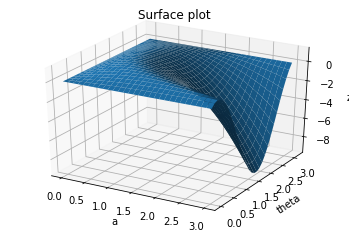

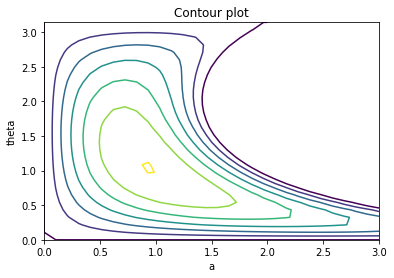

In [129]:
# variables
a = np.linspace(0, 3, 30)
theta = np.linspace(0, pi, 30)
X, Y = np.meshgrid(a, theta)
Z = fvec(X,Y)

# surface plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('a')
ax.set_ylabel('theta')
ax.set_zlabel('z')
ax.set_title('Surface plot')
plt.show()

# contour plot
levels = np.arange(0,1.4,0.2)
plt.contour(X, Y, Z,levels=levels);
plt.xlabel("a")
plt.ylabel("theta")
plt.title('Contour plot');


In [10]:
t = sqrt(3)/2
a = 6/(2*sqrt(3)+3)
b = (3*sqrt(3)+3)/(2*sqrt(3)+3)

In [29]:
a

0.9282032302755092

$$\left(\begin{array}{cc} 
0 & 1.762 & 1 & 0.601\\
1.762  &  -0.494 &  0.761 & 0.322\\
1 & 0.762 & 0 &  0.601\\
0.601 & 0.323 & 0.601 &  0.660\\ 
\end{array}\right)$$


$$\left(\begin{array}{cc} 
0 & sin\theta + 1 & 1 & acos\theta\\
sin\theta + 1 &  −cos(θ)sin(θ) &  sin(θ) & asin^2(θ)−acos^2(θ)+(b−1)cos(θ)\\
1 & sin(θ) & 0 &  acos(θ)\\
acos\theta & (sin^2(θ)−cos^2(θ))a+(b−1)cos(θ) & acos(θ) &  a(2acos(θ)−b+1)sin(θ)\\ 
\end{array}\right)$$

In [30]:
# backtracking line search
import numpy as np

# define function and gradient
def f(a,theta):
    return(a*sin(theta)*(3-a-a*sin(theta)+a*cos(theta)/2))

def grad(a,theta):
    g_a = -sin(theta)*((2*sin(theta)-cos(theta)+2)*a-3)
    g_theta = -a*(a*sin(theta)**2+4*a*cos(theta)*sin(theta)-a*cos(theta)**2+(2*a-6)*cos(theta))/2
    return(np.array([g_a,g_theta]))

x0 = np.array([1.5,0])
dx0 = np.array([grad_a(*x0),grad_theta(*x0)])

def backtrack(x0, dx0):
    # define params
    alpha = 0.1
    beta = 0.5
    t = 1

    count = 0
    
    # written out as seperate components to make debugging easier
    new_point = x0 + t*grad(*x0)
    left_of_func = f(*new_point)
    right_of_func = f(*x0) + alpha * t * np.dot(grad(*x0), grad(*x0))
    while left_of_func - right_of_func < 0 and count < 100:
        t *= beta
        new_point = x0 + t*np.array([grad_a(*x0), grad_theta(*x0)])
        left_of_func = f(*new_point)
        right_of_func = f(*x0) + alpha * t * np.dot(grad(*x0), grad(*x0))
        # Uncomment the following the backtracking
        '''
        print("iteration", count)
        print("Armijo: ",  left_of_func - right_of_func)
        print("_______")
        '''
        count += 1
    # returning negative step because we are gradient ascending, not descending
    return -t 

res = backtrack(x0,dx0)

print("\nfinal step size :",  res)



final step size : -0.25


In [99]:
# initial starting point
X = np.array([1.5,0])
step = backtrack(X,grad(*X))
converging_seq = []

for i in range(0,1000):
    step = backtrack(X,grad(*X))
    X_new = X - step*grad(*X)
    converging_seq.append(X)
    print("New Point: ",X)
    print("grad: ", np.linalg.norm(np.array(X) - np.array(X_new)))
    print("_______")
    if np.linalg.norm(np.array(X) - np.array(X_new)) <= 1e-6:
        break
    X = X_new

New Point:  [1.5 0. ]
grad:  0.84375
_______
New Point:  [1.5     0.84375]
grad:  0.3183636119200181
_______
New Point:  [1.26755999 0.62620223]
grad:  0.25242271933254223
_______
New Point:  [1.26936793 0.87861847]
grad:  0.1552982472114006
_______
New Point:  [1.1379009  0.79595067]
grad:  0.18990113373655532
_______
New Point:  [1.06227075 0.97014171]
grad:  0.06161539979002591
_______
New Point:  [1.00517515 0.94697816]
grad:  0.06907170773550467
_______
New Point:  [0.96061714 0.99975585]
grad:  0.0318416044326705
_______
New Point:  [0.94511741 1.02757035]
grad:  0.0178166012730798
_______
New Point:  [0.92814147 1.03297856]
grad:  0.007752256038070674
_______
New Point:  [0.93349643 1.03858409]
grad:  0.005786949869185755
_______
New Point:  [0.93172017 1.04409169]
grad:  0.002586981564127546
_______
New Point:  [0.9291434  1.04386205]
grad:  0.0022313925162091865
_______
New Point:  [0.93033222 1.04575039]
grad:  0.0019486881656838172
_______
New Point:  [0.92844262 1.04527418]

In [126]:
conv_x = [round(x[0],7) for x in converging_seq] 
conv_y = [round(x[1],7) for x in converging_seq] 

In [127]:
from prettytable import PrettyTable

table = PrettyTable()
table.add_column("iteration", [i+1 for i in range(len(conv_x))])
table.add_column("x-coordinate", conv_x)
table.add_column("y-coordinate", conv_y)
print(table)

+-----------+--------------+--------------+
| iteration | x-coordinate | y-coordinate |
+-----------+--------------+--------------+
|     1     |     1.5      |     0.0      |
|     2     |     1.5      |   0.84375    |
|     3     |   1.26756    |  0.6262022   |
|     4     |  1.2693679   |  0.8786185   |
|     5     |  1.1379009   |  0.7959507   |
|     6     |  1.0622707   |  0.9701417   |
|     7     |  1.0051751   |  0.9469782   |
|     8     |  0.9606171   |  0.9997558   |
|     9     |  0.9451174   |  1.0275703   |
|     10    |  0.9281415   |  1.0329786   |
|     11    |  0.9334964   |  1.0385841   |
|     12    |  0.9317202   |  1.0440917   |
|     13    |  0.9291434   |  1.0438621   |
|     14    |  0.9303322   |  1.0457504   |
|     15    |  0.9284426   |  1.0452742   |
|     16    |  0.9295502   |   1.046588   |
|     17    |  0.9288368   |  1.0463187   |
|     18    |  0.9283832   |  1.0467314   |
|     19    |   0.928481   |  1.0469579   |
|     20    |  0.9282721   |  1.

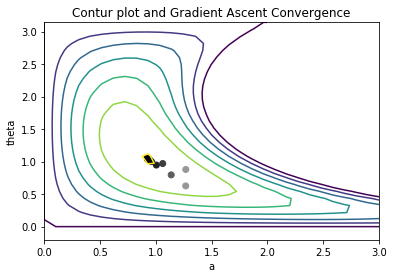

In [121]:
a = np.linspace(0, 3, 30)
theta = np.linspace(0, pi, 30)
X, Y = np.meshgrid(a, theta)
Z = fvec(X,Y)
plt.contour(X, Y, Z,levels=levels);
plt.title('Contur plot and Gradient Ascent Convergence');
plt.xlabel('a');
plt.ylabel('theta');

plt.scatter(conv_x,conv_y,c=converging_seq_x,cmap='gray');